In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [70]:
dataName = 'police_killings.csv'
missingVals = ['Unknown']
#marks values that say "Unknown" as null
df = pd.read_csv(dataName, encoding = "ISO-8859-1", engine='python', na_values = missingVals )
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16.0,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27.0,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26.0,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25.0,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29.0,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [71]:
df.drop(['name','day','year','streetaddress','city','state_fp','county_fp','tract_ce','geo_id','namelsad','lawenforcementagency','county_id'], axis=1, inplace=True)
df.head()

,age,gender,raceethnicity,month,state,latitude,longitude,cause,armed,pop,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,16.0,Male,Black,February,AL,32.529577,-86.362829,Gunshot,No,3779,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,27.0,Male,White,April,LA,31.321739,-92.434860,Gunshot,No,2769,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,26.0,Male,White,March,WI,42.583560,-87.835710,Gunshot,No,4079,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,25.0,Male,Hispanic/Latino,March,CA,33.939298,-118.219463,Gunshot,Firearm,4343,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,29.0,Male,White,March,OH,41.148575,-81.429878,Gunshot,No,6809,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [72]:
df.shape

(467, 22)

In [73]:
df.columns

Index(['age', 'gender', 'raceethnicity', 'month', 'state', 'latitude',
       'longitude', 'cause', 'armed', 'pop', 'share_white', 'share_black',
       'share_hispanic', 'p_income', 'h_income', 'county_income',
       'comp_income', 'county_bucket', 'nat_bucket', 'pov', 'urate',
       'college'],
      dtype='object')

In [74]:
# Column Deletions:
#     -Year(its all 2015)

In [75]:
df.describe()

,age,latitude,longitude,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,463.000000,467.000000,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,37.367171,36.403224,-96.972666,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,12.997134,5.193357,16.953842,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,16.000000,19.915194,-159.642700,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,28.000000,33.335240,-111.954636,3357.500000,32625.000000,43804.000000,0.645365,1.000000,1.000000,0.068592,0.106167
50%,35.000000,35.769779,-94.761902,4447.000000,42759.000000,50856.000000,0.869612,2.000000,2.000000,0.105181,0.169544
75%,45.000000,39.937452,-82.961582,5815.500000,56190.000000,56832.000000,1.081454,4.000000,3.000000,0.140833,0.284542
max,87.000000,61.218408,-68.100007,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             463 non-null    float64
 1   gender          467 non-null    object 
 2   raceethnicity   452 non-null    object 
 3   month           467 non-null    object 
 4   state           467 non-null    object 
 5   latitude        467 non-null    float64
 6   longitude       467 non-null    float64
 7   cause           464 non-null    object 
 8   armed           460 non-null    object 
 9   pop             467 non-null    int64  
 10  share_white     467 non-null    object 
 11  share_black     467 non-null    object 
 12  share_hispanic  467 non-null    object 
 13  p_income        467 non-null    object 
 14  h_income        465 non-null    float64
 15  county_income   467 non-null    int64  
 16  comp_income     465 non-null    float64
 17  county_bucket   440 non-null    flo

In [77]:
df.drop(['p_income', 'county_bucket'], axis=1, inplace=True)
#Dropped the personal income and household income quintile within county,
#because we are just going to use household_income and household income quintile within the nation
df.head()

,age,gender,raceethnicity,month,state,latitude,longitude,cause,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,nat_bucket,pov,urate,college
0,16.0,Male,Black,February,AL,32.529577,-86.362829,Gunshot,No,3779,60.5,30.5,5.6,51367.0,54766,0.937936,3.0,14.1,0.097686,0.168510
1,27.0,Male,White,April,LA,31.321739,-92.434860,Gunshot,No,2769,53.8,36.2,0.5,27972.0,40930,0.683411,1.0,28.8,0.065724,0.111402
2,26.0,Male,White,March,WI,42.583560,-87.835710,Gunshot,No,4079,73.8,7.7,16.8,45365.0,54930,0.825869,3.0,14.6,0.166293,0.147312
3,25.0,Male,Hispanic/Latino,March,CA,33.939298,-118.219463,Gunshot,Firearm,4343,1.2,0.6,98.8,48295.0,55909,0.863814,3.0,11.7,0.124827,0.050133
4,29.0,Male,White,March,OH,41.148575,-81.429878,Gunshot,No,6809,92.5,1.4,1.7,68785.0,49669,1.384868,4.0,1.9,0.063550,0.403954


In [78]:
df.isnull().sum()

age                4
gender             0
raceethnicity     15
month              0
state              0
latitude           0
longitude          0
cause              3
armed              7
pop                0
share_white        0
share_black        0
share_hispanic     0
h_income           2
county_income      0
comp_income        2
nat_bucket         2
pov                0
urate              2
college            2
dtype: int64

In [79]:
df = df.dropna()
df.isnull().sum()
#Here you can see that we deleted all of the rows that had null values

age               0
gender            0
raceethnicity     0
month             0
state             0
latitude          0
longitude         0
cause             0
armed             0
pop               0
share_white       0
share_black       0
share_hispanic    0
h_income          0
county_income     0
comp_income       0
nat_bucket        0
pov               0
urate             0
college           0
dtype: int64

In [82]:
#Convert objects to int and float
df["age"] = df["age"].astype(str).astype(int)
df["h_income"] = df["h_income"].astype(str).astype(float)

ValueError: invalid literal for int() with base 10: '16.0'

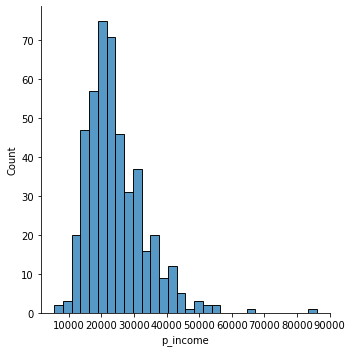

In [85]:
sns.displot(df.h_income)
plt.show()

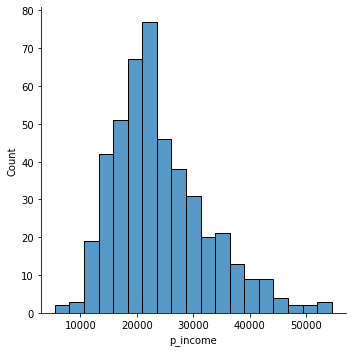

In [86]:
#Mostly distrubted 0 to 140000
sns.displot(df[df.h_income<140000].h_income)
plt.show()

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='armed', ylabel='count'>

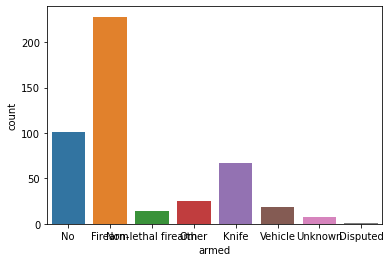

In [87]:
sns.countplot(df.armed)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cause', ylabel='count'>

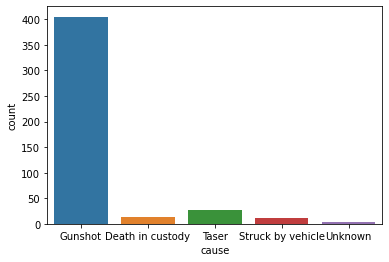

In [88]:
sns.countplot(df.cause)

In [89]:
df.state.unique()

array(['AL', 'LA', 'WI', 'CA', 'OH', 'AZ', 'TX', 'MI', 'IN', 'TN', 'GA',
       'VA', 'NE', 'KS', 'OK', 'OR', 'NH', 'FL', 'MA', 'PA', 'WA', 'AR',
       'IA', 'NC', 'NM', 'DC', 'ID', 'CO', 'HI', 'KY', 'SC', 'WV', 'UT',
       'MO', 'MD', 'NY', 'NJ', 'IL', 'CT', 'MS', 'NV', 'MT', 'AK', 'MN',
       'ME', 'DE', 'WY'], dtype=object)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

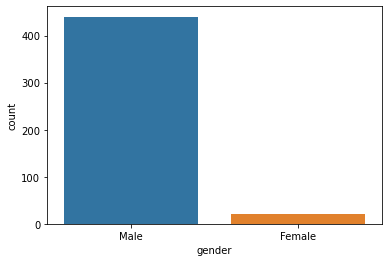

In [90]:
sns.countplot(df.gender)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='raceethnicity', ylabel='count'>

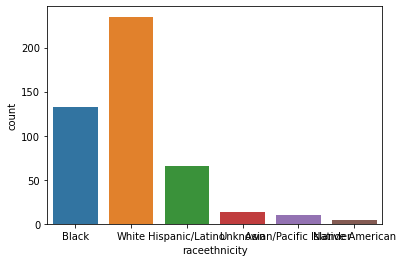

In [91]:
sns.countplot(df.raceethnicity)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

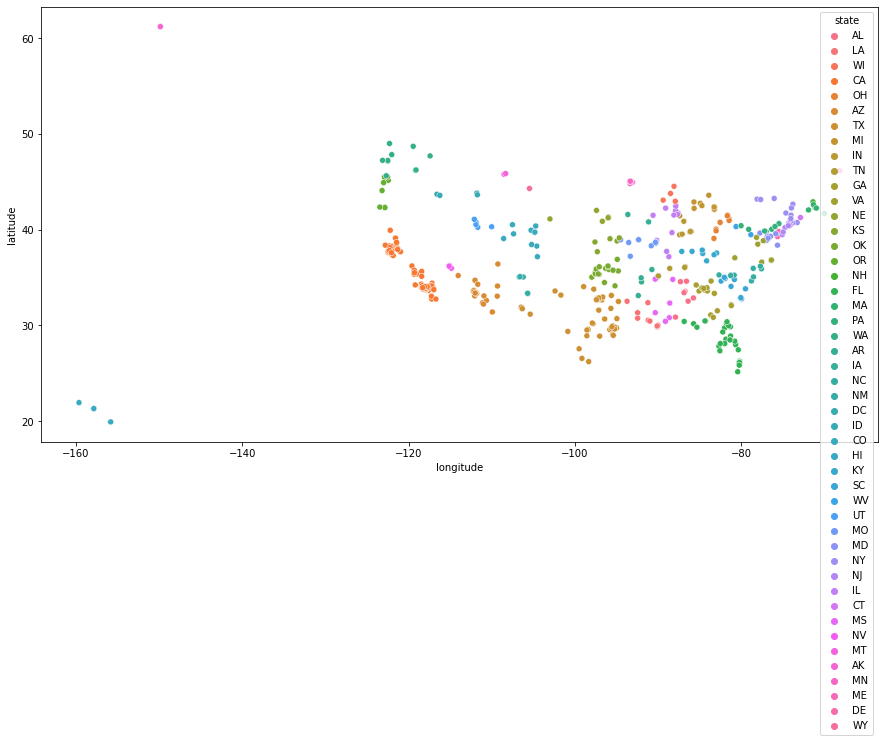

In [92]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.longitude, df.latitude, hue=df.state)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

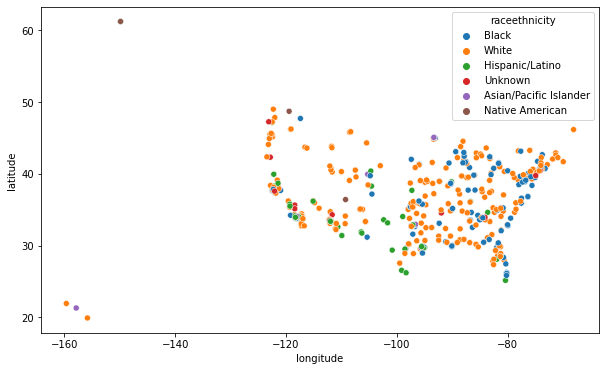

In [93]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.raceethnicity)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

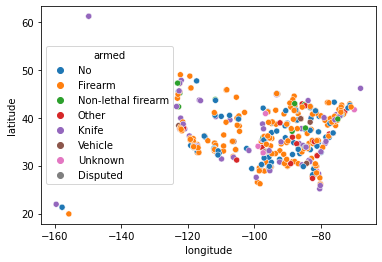

In [94]:
# plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.armed)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

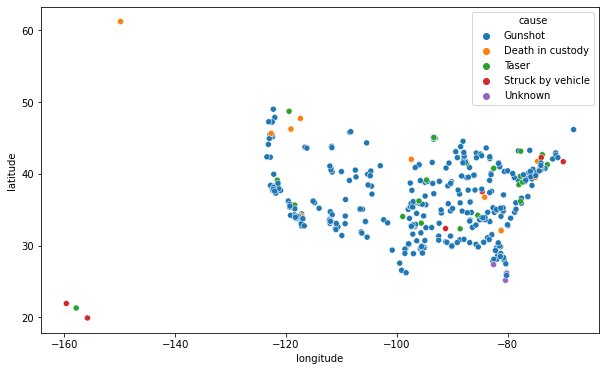

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.cause)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 466
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             461 non-null    int32  
 1   gender          461 non-null    object 
 2   raceethnicity   461 non-null    object 
 3   month           461 non-null    object 
 4   state           461 non-null    object 
 5   latitude        461 non-null    float64
 6   longitude       461 non-null    float64
 7   cause           461 non-null    object 
 8   armed           461 non-null    object 
 9   pop             461 non-null    int64  
 10  share_white     461 non-null    object 
 11  share_black     461 non-null    object 
 12  share_hispanic  461 non-null    object 
 13  p_income        461 non-null    float64
 14  h_income        461 non-null    float64
 15  county_income   461 non-null    int64  
 16  comp_income     461 non-null    float64
 17  county_bucket   436 non-null    flo

In [99]:
df.isnull().sum()

age                0
gender             0
raceethnicity      0
month              0
state              0
latitude           0
longitude          0
cause              0
armed              0
pop                0
share_white        0
share_black        0
share_hispanic     0
p_income           0
h_income           0
county_income      0
comp_income        0
county_bucket     25
nat_bucket         0
pov                0
urate              0
college            0
dtype: int64

In [100]:
df.fillna({'county_bucket': 0}, inplace=True)

In [102]:
df.isnull().sum()

age               0
gender            0
raceethnicity     0
month             0
state             0
latitude          0
longitude         0
cause             0
armed             0
pop               0
share_white       0
share_black       0
share_hispanic    0
p_income          0
h_income          0
county_income     0
comp_income       0
county_bucket     0
nat_bucket        0
pov               0
urate             0
college           0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 466
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             461 non-null    int32  
 1   gender          461 non-null    object 
 2   raceethnicity   461 non-null    object 
 3   month           461 non-null    object 
 4   state           461 non-null    object 
 5   latitude        461 non-null    float64
 6   longitude       461 non-null    float64
 7   cause           461 non-null    object 
 8   armed           461 non-null    object 
 9   pop             461 non-null    int64  
 10  share_white     461 non-null    object 
 11  share_black     461 non-null    object 
 12  share_hispanic  461 non-null    object 
 13  p_income        461 non-null    float64
 14  h_income        461 non-null    float64
 15  county_income   461 non-null    int64  
 16  comp_income     461 non-null    float64
 17  county_bucket   461 non-null    flo

In [104]:
df['gender']=df['gender'].astype('category').cat.codes
df['raceethnicity']=df['raceethnicity'].astype('category').cat.codes
df['month']=df['month'].astype('category').cat.codes
df['state']=df['state'].astype('category').cat.codes
df['cause']=df['cause'].astype('category').cat.codes
df['armed']=df['armed'].astype('category').cat.codes

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 466
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             461 non-null    int32  
 1   gender          461 non-null    int8   
 2   raceethnicity   461 non-null    int8   
 3   month           461 non-null    int8   
 4   state           461 non-null    int8   
 5   latitude        461 non-null    float64
 6   longitude       461 non-null    float64
 7   cause           461 non-null    int8   
 8   armed           461 non-null    int8   
 9   pop             461 non-null    int64  
 10  share_white     461 non-null    object 
 11  share_black     461 non-null    object 
 12  share_hispanic  461 non-null    object 
 13  p_income        461 non-null    float64
 14  h_income        461 non-null    float64
 15  county_income   461 non-null    int64  
 16  comp_income     461 non-null    float64
 17  county_bucket   461 non-null    flo

<AxesSubplot:>

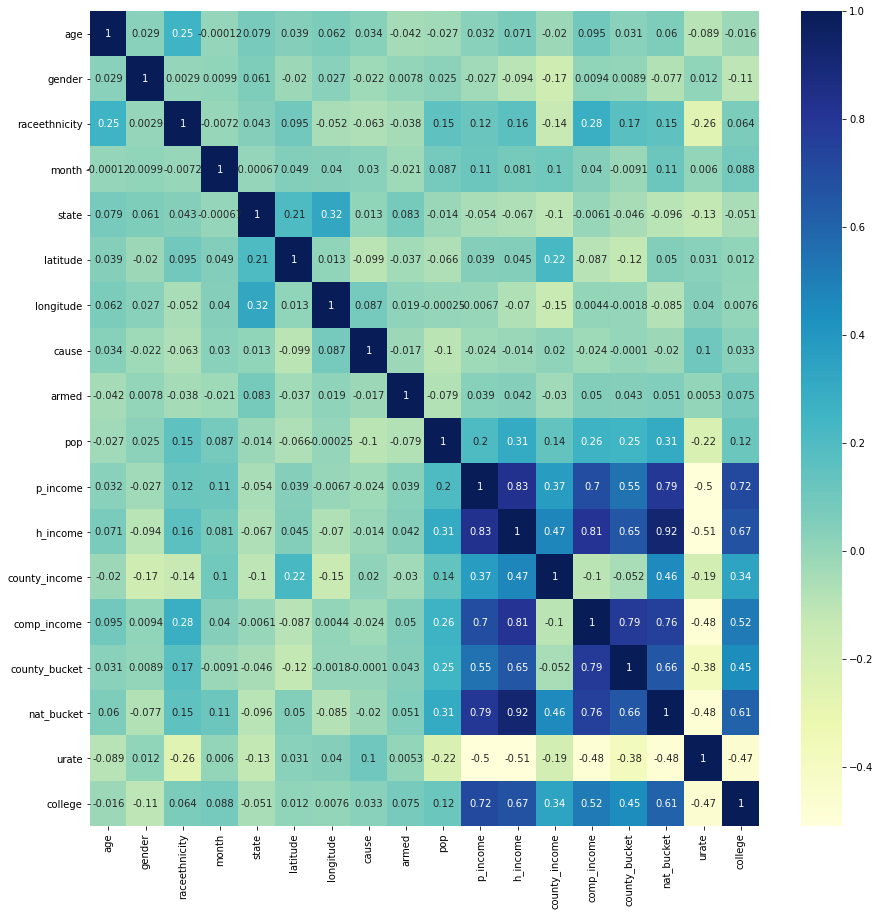

In [109]:
plt.figure(figsize=(15,15))
correlation=df.corr()
sns.heatmap(correlation,cmap='YlGnBu',annot=True)